# Imports

In [2]:
import json
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# Load Dataset

In [3]:
train = json.load(open("whats-cooking/train.json"))
test = json.load(open("whats-cooking/test.json"))

# Preprocessing Dataset

## Converting ingredients for each training instance as 1 string sentence

In [4]:
train_as_text = [' '.join(sample['ingredients']).lower() for sample in train]
train_cuisine = [sample['cuisine'] for sample in train]

test_as_text = [' '.join(sample['ingredients']).lower() for sample in test]

## Get intution for Training instances sample

In [5]:
train_as_text[:3]

['romaine lettuce black olives grape tomatoes garlic pepper purple onion seasoning garbanzo beans feta cheese crumbles',
 'plain flour ground pepper salt tomatoes ground black pepper thyme eggs green tomatoes yellow corn meal milk vegetable oil',
 'eggs pepper salt mayonaise cooking oil green chilies grilled chicken breasts garlic powder yellow onion soy sauce butter chicken livers']

## Word Frequencies with TfidfVectorizer & Label Encoding 

In [6]:
tfidf_enc = TfidfVectorizer(binary=True)
lbl_enc = LabelEncoder()

X = tfidf_enc.fit_transform(train_as_text)
X = X.astype('float16')

X_test = tfidf_enc.transform(test_as_text)
X_test = X_test.astype('float16')

y = lbl_enc.fit_transform(train_cuisine)
print(X.shape)
print(y.shape)

(39774, 3010)
(39774,)


## Split Dataset into 2 segments (Training set & Validation set) with ratio of 0.7 : 0.3 respectively 

In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## Import our ML classifiers and Metrics

In [8]:
from sklearn import svm
from sklearn import tree
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

## Support Vector Machine

### Training

In [9]:
clf = svm.SVC(C=100, kernel='rbf', degree=3,
          gamma=1, coef0=1, shrinking=True, 
          probability=False, tol=0.001, cache_size=200,
          class_weight=None, verbose=True, max_iter=-1,
          decision_function_shape=None, random_state=None)

clf.fit(X_train,y_train)

[LibSVM]

SVC(C=100, cache_size=200, class_weight=None, coef0=1,
  decision_function_shape=None, degree=3, gamma=1, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=True)

### Prediction

In [10]:
y_pred_svm = clf.predict(X_test)
svc_score = accuracy_score(y_test, y_pred_svm)
print("Test Accuracy: ", svc_score)

Test Accuracy:  0.8074247884019107


### Confusion Matrix

Text(0.5, 1.0, 'Confusion matrix')

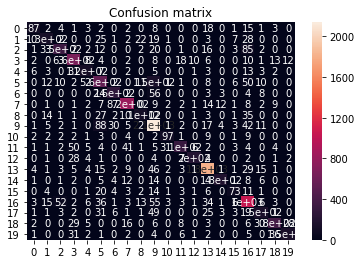

In [11]:
cm = confusion_matrix(y_pred=y_pred_svm, y_true=y_test)
sns.heatmap(cm, annot=True).set_title('Confusion matrix')

### Classification Report

In [12]:
print(classification_report(y_test, y_pred_svm))

              precision    recall  f1-score   support

           0       0.78      0.59      0.67       147
           1       0.67      0.55      0.60       242
           2       0.80      0.70      0.75       495
           3       0.78      0.87      0.82       760
           4       0.73      0.62      0.67       200
           5       0.65      0.68      0.67       820
           6       0.82      0.75      0.78       354
           7       0.89      0.91      0.90       899
           8       0.67      0.53      0.59       207
           9       0.82      0.91      0.86      2351
          10       0.89      0.72      0.80       135
          11       0.85      0.71      0.77       443
          12       0.89      0.78      0.84       249
          13       0.91      0.93      0.92      1957
          14       0.88      0.76      0.81       237
          15       0.66      0.51      0.57       144
          16       0.74      0.81      0.77      1289
          17       0.69    

## Multi-layer perceptron Classifier

### Training

In [13]:
clf2 = MLPClassifier (alpha=0.001, hidden_layer_sizes=(100, 100, 100), random_state=1, activation='logistic' );
clf2.fit(X_train,y_train)

MLPClassifier(activation='logistic', alpha=0.001, batch_size='auto',
       beta_1=0.9, beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100, 100, 100), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=1, shuffle=True, solver='adam', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False)

### Prediction

In [14]:
y_pred_mlp = clf2.predict(X_test)
mlp_score = accuracy_score(y_test, y_pred_mlp)
print("Test Accuracy: ", mlp_score)

Test Accuracy:  0.7418084304030839


### Confusion Matrix

Text(0.5, 1.0, 'Confusion matrix')

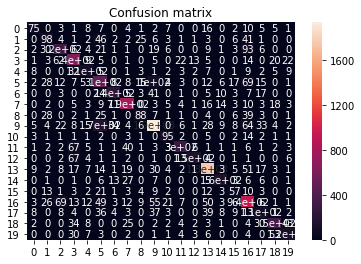

In [15]:
cm = confusion_matrix(y_pred=y_pred_mlp, y_true=y_test)
sns.heatmap(cm, annot=True).set_title('Confusion matrix')

### Classification Report

In [16]:
print(classification_report(y_test, y_pred_mlp))

              precision    recall  f1-score   support

           0       0.63      0.51      0.56       147
           1       0.47      0.40      0.44       242
           2       0.70      0.65      0.68       495
           3       0.68      0.84      0.75       760
           4       0.58      0.55      0.56       200
           5       0.54      0.62      0.57       820
           6       0.75      0.69      0.72       354
           7       0.83      0.88      0.85       899
           8       0.56      0.43      0.48       207
           9       0.85      0.82      0.84      2351
          10       0.60      0.70      0.65       135
          11       0.80      0.67      0.73       443
          12       0.83      0.59      0.69       249
          13       0.88      0.90      0.89      1957
          14       0.73      0.68      0.70       237
          15       0.43      0.40      0.41       144
          16       0.67      0.73      0.70      1289
          17       0.47    

## Random Forest Classifier

### Training

In [17]:
rf = RandomForestClassifier(n_estimators=5)
rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=5, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

## Prediction

In [18]:
y_pred_rf = rf.predict(X_test)

random_forest_score = accuracy_score(y_test, y_pred_rf)
print("Test Accuracy: ", random_forest_score)

Test Accuracy:  0.6280901701164837


## Confusion Matrix

Text(0.5, 1.0, 'Confusion matrix')

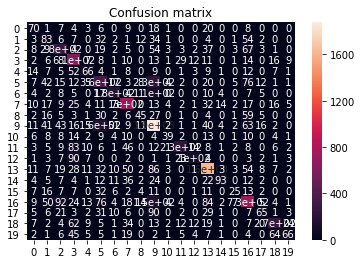

In [19]:
cm = confusion_matrix(y_pred=y_pred_rf, y_true=y_test)
sns.heatmap(cm, annot=True).set_title('Confusion matrix')

## Classification Report

In [20]:
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       0.38      0.48      0.42       147
           1       0.25      0.34      0.29       242
           2       0.49      0.56      0.52       495
           3       0.56      0.81      0.66       760
           4       0.44      0.33      0.38       200
           5       0.42      0.43      0.43       820
           6       0.56      0.49      0.53       354
           7       0.72      0.78      0.75       899
           8       0.45      0.22      0.29       207
           9       0.67      0.80      0.73      2351
          10       0.58      0.29      0.39       135
          11       0.72      0.51      0.60       443
          12       0.66      0.41      0.50       249
          13       0.81      0.83      0.82      1957
          14       0.74      0.39      0.51       237
          15       0.47      0.17      0.25       144
          16       0.60      0.56      0.58      1289
          17       0.51    

## Logistic Regression

### Training

In [21]:
lr = LogisticRegression(solver="lbfgs", multi_class='auto')
lr.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='auto',
          n_jobs=None, penalty='l2', random_state=None, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

### Prediction

In [22]:
y_pred_lr = lr.predict(X_test)
logistic_regression_score = accuracy_score(y_test, y_pred_lr)
print("Test Accuracy: ", logistic_regression_score)

Test Accuracy:  0.7787647699656415


### Consufion Matrix

Text(0.5, 1.0, 'Confusion matrix')

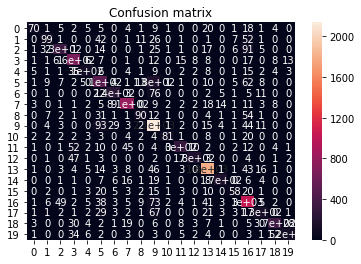

In [23]:
cm = confusion_matrix(y_pred=y_pred_lr, y_true=y_test)
sns.heatmap(cm, annot=True).set_title('Confusion matrix')

### Classification Report

In [24]:
print(classification_report(y_test, y_pred_lr))

              precision    recall  f1-score   support

           0       0.77      0.48      0.59       147
           1       0.72      0.41      0.52       242
           2       0.81      0.67      0.73       495
           3       0.75      0.87      0.81       760
           4       0.70      0.51      0.59       200
           5       0.60      0.63      0.61       820
           6       0.79      0.67      0.73       354
           7       0.87      0.90      0.88       899
           8       0.67      0.43      0.53       207
           9       0.78      0.91      0.84      2351
          10       0.87      0.60      0.71       135
          11       0.84      0.67      0.75       443
          12       0.86      0.71      0.78       249
          13       0.90      0.92      0.91      1957
          14       0.84      0.70      0.77       237
          15       0.63      0.40      0.49       144
          16       0.68      0.80      0.73      1289
          17       0.65    

## K Nearest Neighbor Classifier

### Training

In [25]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

### Prediction

In [26]:
y_pred_knn = knn.predict(X_test)

knn_score = accuracy_score(y_test, y_pred_knn)
print("Test Accuracy: ", knn_score)

Test Accuracy:  0.7317522835833403


### Confusion Matrix

Text(0.5, 1.0, 'Confusion matrix')

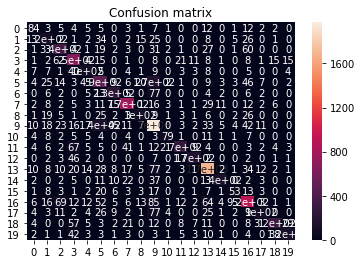

In [27]:
cm = confusion_matrix(y_pred=y_pred_knn, y_true=y_test)
sns.heatmap(cm, annot=True).set_title('Confusion matrix')

### Clasification Report

In [28]:
print(classification_report(y_test, y_pred_knn))

              precision    recall  f1-score   support

           0       0.56      0.57      0.57       147
           1       0.45      0.49      0.47       242
           2       0.68      0.69      0.68       495
           3       0.66      0.85      0.74       760
           4       0.55      0.52      0.53       200
           5       0.54      0.60      0.57       820
           6       0.67      0.66      0.66       354
           7       0.83      0.86      0.84       899
           8       0.60      0.50      0.54       207
           9       0.74      0.84      0.79      2351
          10       0.81      0.59      0.68       135
          11       0.77      0.62      0.69       443
          12       0.80      0.67      0.73       249
          13       0.86      0.87      0.86      1957
          14       0.81      0.59      0.68       237
          15       0.68      0.37      0.48       144
          16       0.74      0.71      0.73      1289
          17       0.68    

## Decision Tree

### Training

In [29]:
dt = tree.DecisionTreeClassifier()
dt = dt.fit(X_train, y_train)

### Prediction

In [30]:
y_pred_dt = dt.predict(X_test)

dt_score = accuracy_score(y_test, y_pred_dt)
print("Test Accuracy: ", dt_score)

Test Accuracy:  0.6059666471130478


### Confusion Matrix

Text(0.5, 1.0, 'Confusion matrix')

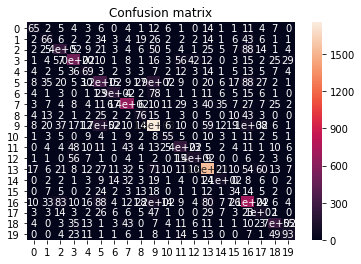

In [31]:
cm = confusion_matrix(y_pred=y_pred_dt, y_true=y_test)
sns.heatmap(cm, annot=True).set_title('Confusion matrix')

### Classification Report

In [32]:
print(classification_report(y_test, y_pred_dt))

              precision    recall  f1-score   support

           0       0.47      0.44      0.46       147
           1       0.31      0.27      0.29       242
           2       0.51      0.48      0.49       495
           3       0.66      0.66      0.66       760
           4       0.32      0.34      0.33       200
           5       0.40      0.39      0.39       820
           6       0.58      0.54      0.56       354
           7       0.73      0.72      0.72       899
           8       0.35      0.37      0.36       207
           9       0.71      0.75      0.73      2351
          10       0.41      0.41      0.41       135
          11       0.55      0.54      0.54       443
          12       0.57      0.54      0.56       249
          13       0.79      0.79      0.79      1957
          14       0.50      0.45      0.47       237
          15       0.23      0.24      0.23       144
          16       0.54      0.55      0.55      1289
          17       0.32    

## Classifiers Accuracy

In [33]:
print("RandomForestClassifier : ", random_forest_score)
print("K Nearest Neighbors : ", knn_score)
print("Logistic Regression : ", logistic_regression_score)
print("Support Vector Classifier : ", svc_score)
print("Decision Tree Classifier : ", dt_score)
print("Multi-Layer Perceptron : ", mlp_score)

RandomForestClassifier :  0.6280901701164837
K Nearest Neighbors :  0.7317522835833403
Logistic Regression :  0.7787647699656415
Support Vector Classifier :  0.8074247884019107
Decision Tree Classifier :  0.6059666471130478
Multi-Layer Perceptron :  0.7418084304030839


## Comparing between Classifiers Performance

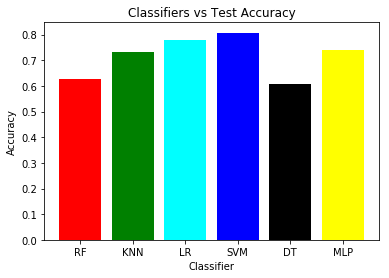

In [35]:
import matplotlib.pyplot as plt

accuracy = [random_forest_score, knn_score, logistic_regression_score, svc_score, dt_score, mlp_score]
plt.bar(['RF', 'KNN', 'LR', 'SVM', 'DT', 'MLP'],accuracy, color=['red', 'green', 'cyan', 'blue', 'black', 'yellow'])
plt.xlabel('Classifier')
plt.ylabel('Accuracy')
plt.title('Classifiers vs Test Accuracy')

plt.show()

## Decision Tree Graph Visalization 

In [36]:
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus

### We will make (max_depth = 7) just for plotting purpose, because if it's more than that it will be too hard to visualize the tree

In [37]:
dt = tree.DecisionTreeClassifier(max_depth=7)
dt = dt.fit(X_train, y_train)

### Visualize the Tree and Save it to the working directory

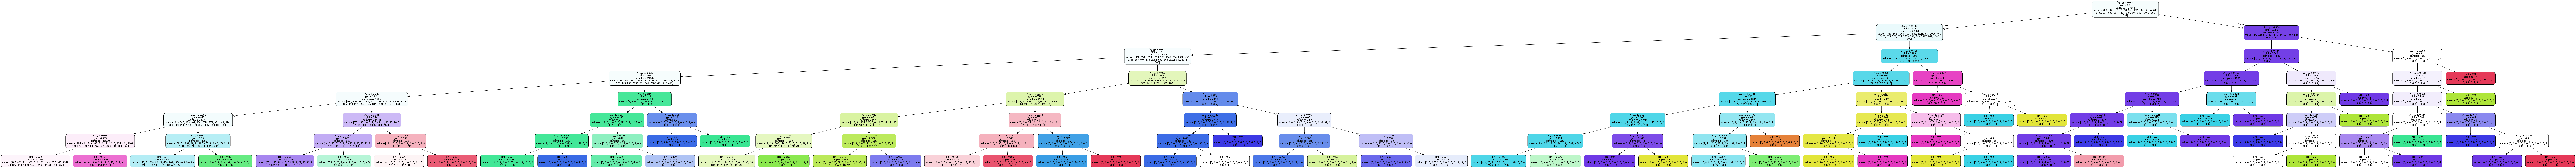

In [38]:
dot_data = StringIO()
export_graphviz(dt, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
# save image to the directory
graph.write_png('decision_tree.png')
Image(graph.create_png())

## ROC Curve only is restricted to the binary classification task
### Reference: https://stackoverflow.com/questions/44070118/valueerror-multiclass-format-is-not-supported-xgboost?rq=1
### Reference: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_auc_score.html

In [40]:
from sklearn.metrics import roc_curve

# calculate roc curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_dt)

# plot the roc curve for the model
pyplot.plot(fpr, tpr, marker='.')

# show the plot
pyplot.show()

ValueError: multiclass format is not supported